# Build dataset

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import afdetection.utils.paths as path
from afdetection.data.make_dataset import MakeDataset

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

sns.set_theme()

In [39]:
make_data = MakeDataset()

## Load metadata

In [40]:
tab_data_DIR = path.data_raw_dir('coorteeqsrafva.csv')
metadata = make_data.read_from_csv(tab_data_DIR, sep=';')

general_metadata = [
    'age', 
    'sex', 
    'height',
    'weight', 
]

diagnostic = [
    'diagnosi',
    'ritmi'
]

metadata = metadata[general_metadata + diagnostic]
print('shape: {}'.format(metadata.shape))
display(metadata.head())

shape: (6428, 6)


,age,sex,height,weight,diagnosi,ritmi
0,54.00,0,NaN,NaN,STACH,VA
1,54.00,0,NaN,NaN,AFLT,AF
2,55.00,0,NaN,NaN,SR,SR
3,29.00,1,164.00,56.00,STACH,VA
4,57.00,0,NaN,NaN,SBRAD,VA


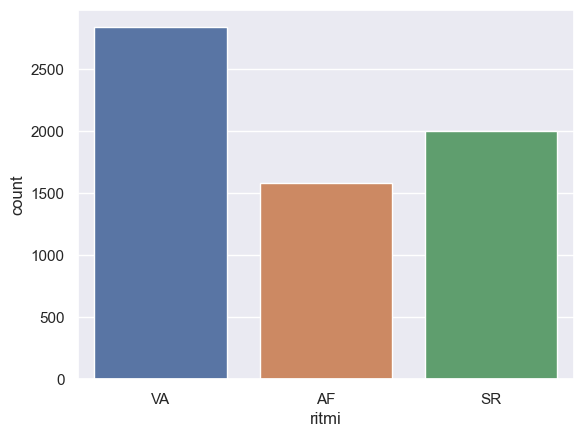

In [41]:
sns.countplot(data=metadata, x='ritmi')
plt.show()

## Load spectral entropy features

In [42]:
ecg_specEn_DIR = path.data_raw_dir('ecg_features_spectral_entropy_qrs.csv')
ecg_specEn = pd.read_csv(ecg_specEn_DIR)
print('shape: {}'.format(ecg_specEn.shape))
display(ecg_specEn.head())

shape: (6428, 12)


,I_specEn,II_specEn,III_specEn,aVF_specEn,aVR_specEn,aVL_specEn,V1_specEn,V2_specEn,V3_specEn,V4_specEn,V5_specEn,V6_specEn
0,1.68,1.75,2.27,1.62,1.80,3.69,2.77,1.65,1.70,1.72,1.67,1.67
1,1.68,1.75,2.27,1.62,1.80,3.69,2.77,1.65,1.70,1.72,1.67,1.67
2,2.51,3.01,4.41,2.72,2.44,3.53,2.68,2.49,2.55,2.56,2.61,2.62
3,1.15,1.77,2.47,1.31,1.09,3.13,0.86,0.93,1.49,1.63,1.02,0.96
4,3.61,3.44,3.89,3.53,3.72,3.45,3.56,3.56,3.54,3.54,3.57,3.56


## Load dominant frequency features

In [43]:
ecg_dFreq_DIR = path.data_raw_dir('ecg_features_dominant_frequency.csv')
ecg_dFreq = pd.read_csv(ecg_dFreq_DIR)
print('shape: {}'.format(ecg_dFreq.shape))
display(ecg_dFreq.head())

shape: (6428, 12)


,I_dFreq,II_dFreq,III_dFreq,aVF_dFreq,aVR_dFreq,aVL_dFreq,V1_dFreq,V2_dFreq,V3_dFreq,V4_dFreq,V5_dFreq,V6_dFreq
0,2.38,2.38,2.38,2.38,2.38,2.38,2.38,2.38,2.38,2.38,2.38,2.38
1,2.38,2.38,2.38,2.38,2.38,2.38,2.38,2.38,2.38,2.38,2.38,2.38
2,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50
3,2.12,2.12,2.12,2.12,2.12,4.25,2.12,2.12,2.12,2.12,2.12,2.12
4,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75


In [44]:
ecg_wavelet_DIR = path.data_raw_dir('ecg_features_wavelet.csv')
ecg_wavelet = pd.read_csv(ecg_wavelet_DIR)

# Select cA5-cD5 energy and mean
support = ecg_wavelet.columns.str.contains('cA5_energy|cD5_energy|mean', regex=True)
ecg_wavelet = ecg_wavelet[ecg_wavelet.columns[support]]

print('shape: {}'.format(ecg_wavelet.shape))
display(ecg_wavelet.head())

shape: (6428, 96)


,I_cA5_energy,I_cD5_energy,I_cA5_mean,I_cD5_mean,I_cD4_mean,I_cD3_mean,I_cD2_mean,I_cD1_mean,II_cA5_energy,II_cD5_energy,...,V5_cD2_mean,V5_cD1_mean,V6_cA5_energy,V6_cD5_energy,V6_cA5_mean,V6_cD5_mean,V6_cD4_mean,V6_cD3_mean,V6_cD2_mean,V6_cD1_mean
0,55.01,96.48,0.01,0.02,-0.02,0.00,0.00,-0.00,71.26,27.23,...,-0.00,0.00,58.36,64.88,-0.01,0.01,-0.02,0.00,-0.00,0.00
1,55.01,96.48,0.01,0.02,-0.02,0.00,0.00,-0.00,71.26,27.23,...,-0.00,0.00,58.36,64.88,-0.01,0.01,-0.02,0.00,-0.00,0.00
2,41.57,20.14,0.06,0.01,-0.00,0.00,0.00,-0.00,64.71,29.19,...,-0.00,-0.00,121.35,57.83,0.10,0.02,-0.00,0.00,0.00,-0.00
3,61.78,51.07,0.04,-0.02,0.01,-0.00,0.00,0.00,125.20,35.36,...,-0.00,0.00,131.98,102.63,0.05,-0.03,0.01,-0.00,0.00,0.00
4,23.35,13.61,0.03,0.01,-0.00,-0.00,0.00,0.00,27.19,7.30,...,0.00,-0.00,66.34,29.05,0.05,0.01,-0.01,-0.00,0.00,-0.00


## Generate dataset

In [45]:
data = pd.concat([ecg_wavelet, ecg_dFreq, ecg_specEn, metadata], axis=1)

data_DIR = path.data_raw_dir('dataset.csv')
data.to_csv(data_DIR, index=False)

In [46]:
data.columns

Index(['I_cA5_energy', 'I_cD5_energy', 'I_cA5_mean', 'I_cD5_mean',
       'I_cD4_mean', 'I_cD3_mean', 'I_cD2_mean', 'I_cD1_mean', 'II_cA5_energy',
       'II_cD5_energy',
       ...
       'V3_specEn', 'V4_specEn', 'V5_specEn', 'V6_specEn', 'age', 'sex',
       'height', 'weight', 'diagnosi', 'ritmi'],
      dtype='object', length=126)

# Validate some estimators

In [47]:
X = data.drop(['diagnosi', 'ritmi'], axis=1)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp_mean.fit_transform(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = data['ritmi']
encoder = LabelEncoder()
y = encoder.fit_transform(y)

print(X)
print(y)

[[-1.42051840e-02  3.13891800e+00  2.19905247e-01 ... -9.57647730e-01
  -5.14808661e-15 -1.37698677e-15]
 [-1.42051840e-02  3.13891800e+00  2.19905247e-01 ... -9.57647730e-01
  -5.14808661e-15 -1.37698677e-15]
 [-1.68042130e-01 -1.07313827e-01  1.61984345e+00 ... -9.57647730e-01
  -5.14808661e-15 -1.37698677e-15]
 ...
 [-5.10433694e-01 -7.17367856e-01 -3.54055182e-01 ...  1.04422531e+00
  -5.14808661e-15 -1.37698677e-15]
 [-4.61655703e-01 -5.86841319e-01 -2.79323241e-01 ...  1.04422531e+00
   1.84820846e+00  9.84293004e-01]
 [-4.36157811e-01 -5.69083084e-01 -2.13193739e-01 ... -9.57647730e-01
  -5.14808661e-15 -1.37698677e-15]]
[2 0 1 ... 1 0 1]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
display(models)

100%|██████████| 29/29 [01:17<00:00,  2.66s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.78,0.79,None,0.78,1.23
LGBMClassifier,0.78,0.78,None,0.78,2.56
XGBClassifier,0.77,0.78,None,0.77,11.27
RandomForestClassifier,0.78,0.78,None,0.78,8.32
SVC,0.75,0.75,None,0.75,3.55
BaggingClassifier,0.75,0.75,None,0.75,8.78
AdaBoostClassifier,0.73,0.75,None,0.73,5.57
NuSVC,0.72,0.72,None,0.72,4.88
KNeighborsClassifier,0.67,0.68,None,0.66,0.19
